In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [58]:
df = pd.read_csv('top10s.csv', encoding='latin-1')
print(df.shape)
print(df.head())

(603, 15)
   Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78  


In [ ]:
# remover colunas que não serão usadas na classificação
df = df.drop(columns=['Unnamed: 0', 'title', 'artist', 'year'])

df.head()

,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,neo mellow,97,89,67,-4,8,80,19,4,83
1,detroit hip hop,87,93,75,-5,52,64,24,23,82
2,dance pop,120,84,76,-3,29,71,10,14,80
3,dance pop,119,92,70,-4,8,71,0,4,79
4,pop,109,84,64,-5,9,43,2,4,78


In [60]:
# move a coluna 'top genre' para o final do dataframe, pois será o atributo classificador
df['top genre'] = df.pop('top genre')

In [61]:
X = df.iloc[:, 0:9] # colunas de 0 a 10 referem-se aos atributos preditores

y = df.iloc[:, 9] # coluna 10, referente a "genre" (atributo calssificador)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [64]:
#substituir valores class por um numero. Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

#df['class.1'] = df['class.1'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#df.head(100)

In [65]:
#Classificador KNN
k = 3
algoritmo = KNeighborsClassifier(n_neighbors = k)
algoritmo.fit(X_treino, y_treino)
previsoes = algoritmo.predict(X_teste)
previsoes

array(['atl hip hop', 'acoustic pop', 'barbadian pop', 'dance pop',
       'baroque pop', 'dance pop', 'dance pop', 'pop', 'dance pop',
       'dance pop', 'dance pop', 'dance pop', 'dance pop', 'big room',
       'dance pop', 'dance pop', 'dance pop', 'dance pop', 'canadian pop',
       'dance pop', 'pop', 'canadian pop', 'dance pop', 'canadian pop',
       'dance pop', 'dance pop', 'art pop', 'dance pop', 'canadian pop',
       'dance pop', 'dance pop', 'dance pop', 'dance pop', 'pop',
       'complextro', 'boy band', 'dance pop', 'dance pop', 'dance pop',
       'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'boy band',
       'dance pop', 'dance pop', 'pop', 'dance pop', 'dance pop',
       'dance pop', 'canadian contemporary r&b', 'canadian pop',
       'dance pop', 'barbadian pop', 'alaska indie', 'dance pop',
       'dance pop', 'dance pop', 'dance pop', 'dance pop'], dtype=object)

In [66]:
#Matriz de Confusão e validação da classificação

#                       classificação_real, classificação prevista
matriz_confusao = confusion_matrix(y_teste, previsoes)

acuracia = accuracy_score(y_teste, previsoes)

print(matriz_confusao)
print(acuracia)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  1  1  0  0  2  1 27  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  1  0  4  0  2]]
0.4918032786885246


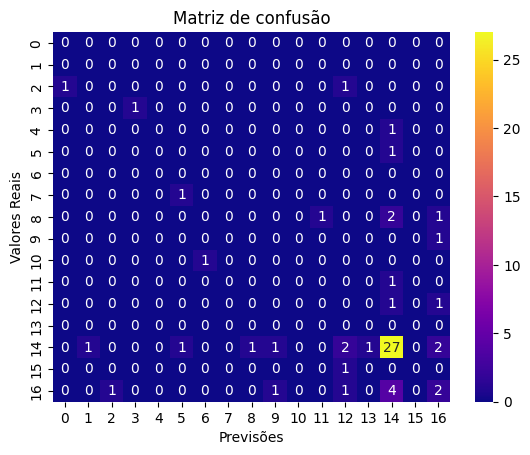

In [67]:
sns.heatmap(matriz_confusao, annot = True, fmt='d', cmap = 'plasma')
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")

plt.title("Matriz de confusão")
plt.show()

In [68]:
print(classification_report(y_teste, previsoes))

                           precision    recall  f1-score   support

             acoustic pop       0.00      0.00      0.00         0
             alaska indie       0.00      0.00      0.00         0
                  art pop       0.00      0.00      0.00         2
              atl hip hop       1.00      1.00      1.00         1
           australian pop       0.00      0.00      0.00         1
            barbadian pop       0.00      0.00      0.00         1
              baroque pop       0.00      0.00      0.00         0
              belgian edm       0.00      0.00      0.00         1
                 big room       0.00      0.00      0.00         4
                 boy band       0.00      0.00      0.00         1
             british soul       0.00      0.00      0.00         1
canadian contemporary r&b       0.00      0.00      0.00         1
             canadian pop       0.00      0.00      0.00         2
               complextro       0.00      0.00      0.00     

c:\Users\Pedro\Desktop\Projetos\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pedro\Desktop\Projetos\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pedro\Desktop\Projetos\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(